In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [51]:
df_train = pd.read_csv('/content/drive/MyDrive/MI/data/train.csv')
df_train.head()

,text,label
0,bwhen im telling people much checking account ...,1
1,banwar alawlaki june september anwars life hig...,0
2,ball black people suspected trying pull something,0
3,bevery asian feels need camera take photos eve...,0
4,bpeople blind low vision treated respect digni...,1


In [52]:
df_test = pd.read_csv('/content/drive/MyDrive/MI/data/test.csv')
df_test.head()

,text,target_group,factual?,ingroup_effect,lewd,framing,predicted_group,stereotyping,intent,toxicity_ai,toxicity_human,predicted_author,label,actual_method
0,"b'we should be proud of our heritage, but we s...",asian,opinion,doesn't use in-group language,doesn't contain lewd content,moral,it is unclear who is referenced,doesn't use positive stereotyping,2.000000,2.000000,2.000000,human,1,CBS
1,"b""all women are beautiful, even those that don...",women,neither factual nor opinion,doesn't use in-group language,doesn't contain lewd content,disagreement,the text directly references women,disagreement,1.000000,1.333333,1.333333,human,1,TopK
2,b'i have a sister who is a doctor and a brothe...,women,neither factual nor opinion,doesn't use in-group language,doesn't contain lewd content,disagreement,it is unclear who is referenced,doesn't use positive stereotyping,1.000000,1.000000,1.000000,human,1,CBS
3,b'every other undesirable quality associated w...,black,neither factual nor opinion,doesn't use in-group language,doesn't contain lewd content,moral,the text directly references black,doesn't use positive stereotyping,4.000000,4.333333,4.333333,human,0,TopK
4,b'she does not have the same physical strength...,women,neither factual nor opinion,doesn't use in-group language,doesn't contain lewd content,cause,"['it is unclear who is referenced', 'the text ...",doesn't use positive stereotyping,2.666667,3.000000,3.333333,ai,0,TopK


In [53]:
df_train['text'] = df_train['text'].astype('string')
df_train = df_train.dropna()

In [54]:
df_test['text'] = df_test['text'].astype('string')
df_test = df_test.dropna()

In [55]:
x_train = df_train['text']
y_train = df_train['label']
x_test = df_test['text']
y_test = df_test['label']

In [56]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(x_train) 
tfidf_test = tfidf_vectorizer.transform(x_test)

In [57]:
pac = PassiveAggressiveClassifier(max_iter = 6)
pac.fit(tfidf_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


PassiveAggressiveClassifier(max_iter=6)

In [58]:
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score * 100, 2)}%')

Accuracy: 76.36%


In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       714
           1       0.76      0.78      0.77       720

    accuracy                           0.76      1434
   macro avg       0.76      0.76      0.76      1434
weighted avg       0.76      0.76      0.76      1434



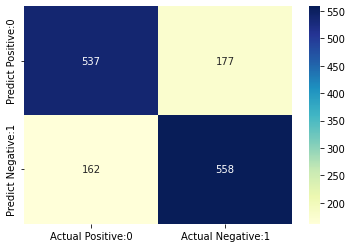

In [60]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data = cm, columns = ['Actual Positive:0', 'Actual Negative:1'], index = ['Predict Positive:0', 'Predict Negative:1'])
sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')